In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
import pylab as plt
from astrometry.libkd.spherematch import *
from astrometry.util.fits import *
import numpy as np
from astrometry.util.starutil_numpy import *
from astrometry.util.plotutils import *
from glob import glob
from collections import Counter
import os

In [2]:
TT = []
for brick in [1,2,3]:
    for field in range(1,18+1):
        for chip in [1,2]:
            T = fits_table('/global/cscratch1/sd/dstn/m33-catalogs/split/14610_M33-B%02i-F%02i.chip%i.gst.fits.gz' % (brick, field, chip))
            TT.append(T)

In [4]:
Tall = merge_tables(TT)

In [5]:
I,J,d = match_radec(Tall.ra, Tall.dec, Tall.ra, Tall.dec, 0.5/3600., notself=True)

In [6]:
K, = np.nonzero(I < J)
I = I[K]
J = J[K]

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([ 23.31951193,  23.32315841,  23.32680489,  23.33045137,
         23.33409785,  23.33774433,  23.34139081,  23.34503729,
         23.34868377,  23.35233025,  23.35597673,  23.35962321,
         23.36326969,  23.36691617,  23.37056265,  23.37420913,
         23.37785561,  23.38150209,  23.38514857,  23.38879505,
         23.39244153,  23.39608801,  23.39973449,  23.40338097,
         23.40702745,  23.41067393,  23.41432041,  23.41796689,
         23.42161337,  23.42525985,  23.42890633,  23.43255281,
         23.43619929,  23.43984577,  23.44349225,  23.44713873,
         23.45078521,  23.45443169,  23.45807817,  23.46172465,
         23.46537113,  23.46901761,  23.47266409,  23.47631057,
         2

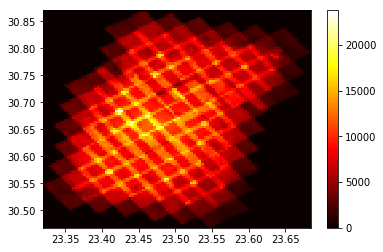

In [7]:
plothist(Tall.ra, Tall.dec);

1089325486 matches


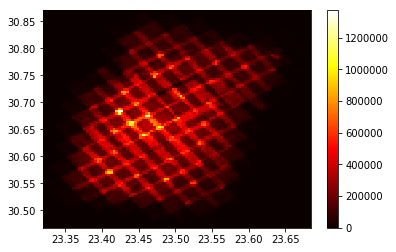

In [8]:
print(len(I), 'matches')
plothist(Tall.ra[I], Tall.dec[I]);

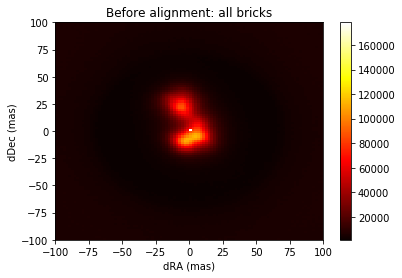

In [24]:
cosdec = np.cos(np.deg2rad(30.))
dra = (Tall.ra[I]-Tall.ra[J])*cosdec * 3600.*1000.
ddec = (Tall.dec[I]-Tall.dec[J]) * 3600.*1000.
plothist(dra, ddec, range=((-100,100),(-100,100)))
plt.xlabel('dRA (mas)')
plt.ylabel('dDec (mas)');
plt.title('Before alignment: all bricks')
plt.savefig('before.png');

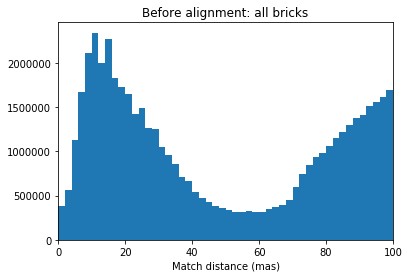

In [26]:
plt.hist(d[K]*3600.*1000., bins=50, range=(0,100));
plt.xlabel('Match distance (mas)');
plt.title('Before alignment: all bricks')
plt.xlim(0,100)
plt.savefig('before-dists.png');

In [11]:
pwd

'/global/u1/d/dstn/align'

In [13]:
from astromalign import astrom_intra

In [14]:
align = astrom_intra.intrabrickshift(TT, matchradius=0.1)

silent? False
Intrabrickshift: before alignment:
Wall: 8.14 s, CPU: 4.63 s
Intrabrickshift: after alignment:
Matching 0 to 1 with radius 0.1 arcsec...
Failed to find a shift between files 0 and 1
Matching 0 to 2 with radius 0.1 arcsec...
Matching 0 to 2 : got 14552
Matching 0 to 12 with radius 0.1 arcsec...
Matching 0 to 12 : got 9546
Matching 0 to 13 with radius 0.1 arcsec...
Failed to find a shift between files 0 and 13
Matching 0 to 14 with radius 0.1 arcsec...
Failed to find a shift between files 0 and 14
Matching 0 to 24 with radius 0.1 arcsec...
Failed to find a shift between files 0 and 24
Matching 0 to 25 with radius 0.1 arcsec...
Failed to find a shift between files 0 and 25
Matching 0 to 26 with radius 0.1 arcsec...
Failed to find a shift between files 0 and 26
Matching 0 to 36 with radius 0.1 arcsec...
Failed to find a shift between files 0 and 36
Matching 0 to 48 with radius 0.1 arcsec...
Failed to find a shift between files 0 and 48
Matching 1 to 2 with radius 0.1 arcsec..

Failed to find a shift between files 4 and 15
Matching 4 to 16 with radius 0.1 arcsec...
Matching 4 to 16 : got 26000
Matching 4 to 17 with radius 0.1 arcsec...
Failed to find a shift between files 4 and 17
Matching 4 to 19 with radius 0.1 arcsec...
Failed to find a shift between files 4 and 19
Matching 4 to 24 with radius 0.1 arcsec...
Failed to find a shift between files 4 and 24
Matching 4 to 25 with radius 0.1 arcsec...
Failed to find a shift between files 4 and 25
Matching 4 to 26 with radius 0.1 arcsec...
Failed to find a shift between files 4 and 26
Matching 4 to 27 with radius 0.1 arcsec...
Failed to find a shift between files 4 and 27
Matching 4 to 28 with radius 0.1 arcsec...
Failed to find a shift between files 4 and 28
Matching 4 to 29 with radius 0.1 arcsec...
Failed to find a shift between files 4 and 29
Matching 4 to 31 with radius 0.1 arcsec...
Failed to find a shift between files 4 and 31
Matching 4 to 36 with radius 0.1 arcsec...
Failed to find a shift between files 4

Matching 6 to 19 : got 204980
Matching 6 to 20 with radius 0.1 arcsec...
Failed to find a shift between files 6 and 20
Matching 6 to 21 with radius 0.1 arcsec...
Matching 6 to 21 : got 121107
Matching 6 to 23 with radius 0.1 arcsec...
Failed to find a shift between files 6 and 23
Matching 6 to 28 with radius 0.1 arcsec...
Failed to find a shift between files 6 and 28
Matching 6 to 29 with radius 0.1 arcsec...
Failed to find a shift between files 6 and 29
Matching 6 to 30 with radius 0.1 arcsec...
Failed to find a shift between files 6 and 30
Matching 6 to 31 with radius 0.1 arcsec...
Matching 6 to 31 : got 13568
Matching 6 to 32 with radius 0.1 arcsec...
Failed to find a shift between files 6 and 32
Matching 6 to 33 with radius 0.1 arcsec...
Failed to find a shift between files 6 and 33
Matching 6 to 37 with radius 0.1 arcsec...
Failed to find a shift between files 6 and 37
Matching 6 to 38 with radius 0.1 arcsec...
Failed to find a shift between files 6 and 38
Matching 6 to 39 with ra

Failed to find a shift between files 7 and 96
Matching 7 to 97 with radius 0.1 arcsec...
Failed to find a shift between files 7 and 97
Matching 7 to 98 with radius 0.1 arcsec...
Failed to find a shift between files 7 and 98
Matching 7 to 99 with radius 0.1 arcsec...
Failed to find a shift between files 7 and 99
Matching 7 to 100 with radius 0.1 arcsec...
Failed to find a shift between files 7 and 100
Matching 8 to 9 with radius 0.1 arcsec...
Failed to find a shift between files 8 and 9
Matching 8 to 10 with radius 0.1 arcsec...
Matching 8 to 10 : got 37121
Matching 8 to 11 with radius 0.1 arcsec...
Matching 8 to 11 : got 182155
Matching 8 to 12 with radius 0.1 arcsec...
Failed to find a shift between files 8 and 12
Matching 8 to 13 with radius 0.1 arcsec...
Failed to find a shift between files 8 and 13
Matching 8 to 14 with radius 0.1 arcsec...
Failed to find a shift between files 8 and 14
Matching 8 to 15 with radius 0.1 arcsec...
Failed to find a shift between files 8 and 15
Matching

Failed to find a shift between files 9 and 63
Matching 9 to 64 with radius 0.1 arcsec...
Failed to find a shift between files 9 and 64
Matching 9 to 65 with radius 0.1 arcsec...
Failed to find a shift between files 9 and 65
Matching 9 to 66 with radius 0.1 arcsec...
Failed to find a shift between files 9 and 66
Matching 9 to 67 with radius 0.1 arcsec...
Failed to find a shift between files 9 and 67
Matching 9 to 73 with radius 0.1 arcsec...
Failed to find a shift between files 9 and 73
Matching 9 to 74 with radius 0.1 arcsec...
Failed to find a shift between files 9 and 74
Matching 9 to 75 with radius 0.1 arcsec...
Failed to find a shift between files 9 and 75
Matching 9 to 76 with radius 0.1 arcsec...
Failed to find a shift between files 9 and 76
Matching 9 to 77 with radius 0.1 arcsec...
Failed to find a shift between files 9 and 77
Matching 9 to 78 with radius 0.1 arcsec...
Failed to find a shift between files 9 and 78
Matching 9 to 79 with radius 0.1 arcsec...
Failed to find a shif

Failed to find a shift between files 11 and 35
Matching 11 to 41 with radius 0.1 arcsec...
Failed to find a shift between files 11 and 41
Matching 11 to 42 with radius 0.1 arcsec...
Failed to find a shift between files 11 and 42
Matching 11 to 43 with radius 0.1 arcsec...
Failed to find a shift between files 11 and 43
Matching 11 to 44 with radius 0.1 arcsec...
Failed to find a shift between files 11 and 44
Matching 11 to 45 with radius 0.1 arcsec...
Failed to find a shift between files 11 and 45
Matching 11 to 47 with radius 0.1 arcsec...
Failed to find a shift between files 11 and 47
Matching 11 to 52 with radius 0.1 arcsec...
Failed to find a shift between files 11 and 52
Matching 11 to 53 with radius 0.1 arcsec...
Failed to find a shift between files 11 and 53
Matching 11 to 54 with radius 0.1 arcsec...
Failed to find a shift between files 11 and 54
Matching 11 to 55 with radius 0.1 arcsec...
Failed to find a shift between files 11 and 55
Matching 11 to 56 with radius 0.1 arcsec...

Matching 15 to 28 : got 140617
Matching 15 to 29 with radius 0.1 arcsec...
Failed to find a shift between files 15 and 29
Matching 15 to 31 with radius 0.1 arcsec...
Failed to find a shift between files 15 and 31
Matching 15 to 36 with radius 0.1 arcsec...
Matching 15 to 36 : got 6153
Matching 15 to 37 with radius 0.1 arcsec...
Failed to find a shift between files 15 and 37
Matching 15 to 38 with radius 0.1 arcsec...
Failed to find a shift between files 15 and 38
Matching 15 to 39 with radius 0.1 arcsec...
Failed to find a shift between files 15 and 39
Matching 15 to 40 with radius 0.1 arcsec...
Failed to find a shift between files 15 and 40
Matching 15 to 48 with radius 0.1 arcsec...
Failed to find a shift between files 15 and 48
Matching 15 to 49 with radius 0.1 arcsec...
Failed to find a shift between files 15 and 49
Matching 15 to 50 with radius 0.1 arcsec...
Failed to find a shift between files 15 and 50
Matching 15 to 51 with radius 0.1 arcsec...
Failed to find a shift between fi

Failed to find a shift between files 17 and 75
Matching 17 to 76 with radius 0.1 arcsec...
Failed to find a shift between files 17 and 76
Matching 17 to 84 with radius 0.1 arcsec...
Failed to find a shift between files 17 and 84
Matching 17 to 85 with radius 0.1 arcsec...
Failed to find a shift between files 17 and 85
Matching 17 to 86 with radius 0.1 arcsec...
Failed to find a shift between files 17 and 86
Matching 17 to 87 with radius 0.1 arcsec...
Failed to find a shift between files 17 and 87
Matching 17 to 88 with radius 0.1 arcsec...
Failed to find a shift between files 17 and 88
Matching 17 to 96 with radius 0.1 arcsec...
Failed to find a shift between files 17 and 96
Matching 17 to 97 with radius 0.1 arcsec...
Failed to find a shift between files 17 and 97
Matching 17 to 98 with radius 0.1 arcsec...
Failed to find a shift between files 17 and 98
Matching 17 to 99 with radius 0.1 arcsec...
Failed to find a shift between files 17 and 99
Matching 17 to 100 with radius 0.1 arcsec..

Failed to find a shift between files 19 and 63
Matching 19 to 64 with radius 0.1 arcsec...
Failed to find a shift between files 19 and 64
Matching 19 to 65 with radius 0.1 arcsec...
Failed to find a shift between files 19 and 65
Matching 19 to 72 with radius 0.1 arcsec...
Failed to find a shift between files 19 and 72
Matching 19 to 73 with radius 0.1 arcsec...
Failed to find a shift between files 19 and 73
Matching 19 to 74 with radius 0.1 arcsec...
Failed to find a shift between files 19 and 74
Matching 19 to 75 with radius 0.1 arcsec...
Failed to find a shift between files 19 and 75
Matching 19 to 76 with radius 0.1 arcsec...
Failed to find a shift between files 19 and 76
Matching 19 to 77 with radius 0.1 arcsec...
Failed to find a shift between files 19 and 77
Matching 19 to 84 with radius 0.1 arcsec...
Failed to find a shift between files 19 and 84
Matching 19 to 85 with radius 0.1 arcsec...
Failed to find a shift between files 19 and 85
Matching 19 to 86 with radius 0.1 arcsec...

Failed to find a shift between files 21 and 50
Matching 21 to 51 with radius 0.1 arcsec...
Failed to find a shift between files 21 and 51
Matching 21 to 52 with radius 0.1 arcsec...
Failed to find a shift between files 21 and 52
Matching 21 to 53 with radius 0.1 arcsec...
Failed to find a shift between files 21 and 53
Matching 21 to 54 with radius 0.1 arcsec...
Failed to find a shift between files 21 and 54
Matching 21 to 55 with radius 0.1 arcsec...
Failed to find a shift between files 21 and 55
Matching 21 to 57 with radius 0.1 arcsec...
Failed to find a shift between files 21 and 57
Matching 21 to 62 with radius 0.1 arcsec...
Failed to find a shift between files 21 and 62
Matching 21 to 63 with radius 0.1 arcsec...
Failed to find a shift between files 21 and 63
Matching 21 to 64 with radius 0.1 arcsec...
Failed to find a shift between files 21 and 64
Matching 21 to 65 with radius 0.1 arcsec...
Failed to find a shift between files 21 and 65
Matching 21 to 66 with radius 0.1 arcsec...

Failed to find a shift between files 23 and 42
Matching 23 to 43 with radius 0.1 arcsec...
Failed to find a shift between files 23 and 43
Matching 23 to 44 with radius 0.1 arcsec...
Failed to find a shift between files 23 and 44
Matching 23 to 45 with radius 0.1 arcsec...
Failed to find a shift between files 23 and 45
Matching 23 to 47 with radius 0.1 arcsec...
Failed to find a shift between files 23 and 47
Matching 23 to 52 with radius 0.1 arcsec...
Failed to find a shift between files 23 and 52
Matching 23 to 53 with radius 0.1 arcsec...
Failed to find a shift between files 23 and 53
Matching 23 to 54 with radius 0.1 arcsec...
Failed to find a shift between files 23 and 54
Matching 23 to 55 with radius 0.1 arcsec...
Failed to find a shift between files 23 and 55
Matching 23 to 56 with radius 0.1 arcsec...
Failed to find a shift between files 23 and 56
Matching 23 to 57 with radius 0.1 arcsec...
Failed to find a shift between files 23 and 57
Matching 23 to 59 with radius 0.1 arcsec...

Failed to find a shift between files 27 and 61
Matching 27 to 62 with radius 0.1 arcsec...
Failed to find a shift between files 27 and 62
Matching 27 to 63 with radius 0.1 arcsec...
Failed to find a shift between files 27 and 63
Matching 27 to 72 with radius 0.1 arcsec...
Failed to find a shift between files 27 and 72
Matching 27 to 73 with radius 0.1 arcsec...
Failed to find a shift between files 27 and 73
Matching 27 to 74 with radius 0.1 arcsec...
Failed to find a shift between files 27 and 74
Matching 27 to 75 with radius 0.1 arcsec...
Failed to find a shift between files 27 and 75
Matching 27 to 84 with radius 0.1 arcsec...
Failed to find a shift between files 27 and 84
Matching 27 to 85 with radius 0.1 arcsec...
Failed to find a shift between files 27 and 85
Matching 27 to 86 with radius 0.1 arcsec...
Failed to find a shift between files 27 and 86
Matching 27 to 96 with radius 0.1 arcsec...
Failed to find a shift between files 27 and 96
Matching 27 to 97 with radius 0.1 arcsec...

Failed to find a shift between files 30 and 42
Matching 30 to 43 with radius 0.1 arcsec...
Matching 30 to 43 : got 263945
Matching 30 to 45 with radius 0.1 arcsec...
Failed to find a shift between files 30 and 45
Matching 30 to 50 with radius 0.1 arcsec...
Failed to find a shift between files 30 and 50
Matching 30 to 51 with radius 0.1 arcsec...
Failed to find a shift between files 30 and 51
Matching 30 to 52 with radius 0.1 arcsec...
Failed to find a shift between files 30 and 52
Matching 30 to 53 with radius 0.1 arcsec...
Failed to find a shift between files 30 and 53
Matching 30 to 54 with radius 0.1 arcsec...
Failed to find a shift between files 30 and 54
Matching 30 to 55 with radius 0.1 arcsec...
Failed to find a shift between files 30 and 55
Matching 30 to 57 with radius 0.1 arcsec...
Failed to find a shift between files 30 and 57
Matching 30 to 61 with radius 0.1 arcsec...
Failed to find a shift between files 30 and 61
Matching 30 to 62 with radius 0.1 arcsec...
Failed to find 

Failed to find a shift between files 32 and 53
Matching 32 to 54 with radius 0.1 arcsec...
Failed to find a shift between files 32 and 54
Matching 32 to 55 with radius 0.1 arcsec...
Matching 32 to 55 : got 9782
Matching 32 to 56 with radius 0.1 arcsec...
Failed to find a shift between files 32 and 56
Matching 32 to 57 with radius 0.1 arcsec...
Failed to find a shift between files 32 and 57
Matching 32 to 59 with radius 0.1 arcsec...
Failed to find a shift between files 32 and 59
Matching 32 to 63 with radius 0.1 arcsec...
Failed to find a shift between files 32 and 63
Matching 32 to 64 with radius 0.1 arcsec...
Failed to find a shift between files 32 and 64
Matching 32 to 65 with radius 0.1 arcsec...
Failed to find a shift between files 32 and 65
Matching 32 to 66 with radius 0.1 arcsec...
Failed to find a shift between files 32 and 66
Matching 32 to 67 with radius 0.1 arcsec...
Failed to find a shift between files 32 and 67
Matching 32 to 68 with radius 0.1 arcsec...
Failed to find a 

Failed to find a shift between files 34 and 58
Matching 34 to 59 with radius 0.1 arcsec...
Failed to find a shift between files 34 and 59
Matching 34 to 65 with radius 0.1 arcsec...
Failed to find a shift between files 34 and 65
Matching 34 to 66 with radius 0.1 arcsec...
Failed to find a shift between files 34 and 66
Matching 34 to 67 with radius 0.1 arcsec...
Failed to find a shift between files 34 and 67
Matching 34 to 68 with radius 0.1 arcsec...
Failed to find a shift between files 34 and 68
Matching 34 to 69 with radius 0.1 arcsec...
Failed to find a shift between files 34 and 69
Matching 34 to 70 with radius 0.1 arcsec...
Failed to find a shift between files 34 and 70
Matching 34 to 71 with radius 0.1 arcsec...
Failed to find a shift between files 34 and 71
Matching 34 to 77 with radius 0.1 arcsec...
Failed to find a shift between files 34 and 77
Matching 34 to 78 with radius 0.1 arcsec...
Failed to find a shift between files 34 and 78
Matching 34 to 79 with radius 0.1 arcsec...

Matching 37 to 49 : got 23373
Matching 37 to 50 with radius 0.1 arcsec...
Matching 37 to 50 : got 150078
Matching 37 to 51 with radius 0.1 arcsec...
Failed to find a shift between files 37 and 51
Matching 37 to 52 with radius 0.1 arcsec...
Failed to find a shift between files 37 and 52
Matching 37 to 60 with radius 0.1 arcsec...
Matching 37 to 60 : got 9637
Matching 37 to 61 with radius 0.1 arcsec...
Failed to find a shift between files 37 and 61
Matching 37 to 62 with radius 0.1 arcsec...
Failed to find a shift between files 37 and 62
Matching 37 to 63 with radius 0.1 arcsec...
Failed to find a shift between files 37 and 63
Matching 37 to 72 with radius 0.1 arcsec...
Failed to find a shift between files 37 and 72
Matching 37 to 73 with radius 0.1 arcsec...
Failed to find a shift between files 37 and 73
Matching 37 to 74 with radius 0.1 arcsec...
Failed to find a shift between files 37 and 74
Matching 37 to 75 with radius 0.1 arcsec...
Failed to find a shift between files 37 and 75
Mat

Failed to find a shift between files 40 and 72
Matching 40 to 73 with radius 0.1 arcsec...
Failed to find a shift between files 40 and 73
Matching 40 to 74 with radius 0.1 arcsec...
Failed to find a shift between files 40 and 74
Matching 40 to 75 with radius 0.1 arcsec...
Failed to find a shift between files 40 and 75
Matching 40 to 76 with radius 0.1 arcsec...
Failed to find a shift between files 40 and 76
Matching 40 to 77 with radius 0.1 arcsec...
Failed to find a shift between files 40 and 77
Matching 40 to 79 with radius 0.1 arcsec...
Failed to find a shift between files 40 and 79
Matching 40 to 84 with radius 0.1 arcsec...
Failed to find a shift between files 40 and 84
Matching 40 to 85 with radius 0.1 arcsec...
Failed to find a shift between files 40 and 85
Matching 40 to 86 with radius 0.1 arcsec...
Failed to find a shift between files 40 and 86
Matching 40 to 87 with radius 0.1 arcsec...
Failed to find a shift between files 40 and 87
Matching 40 to 88 with radius 0.1 arcsec...

Failed to find a shift between files 42 and 102
Matching 42 to 103 with radius 0.1 arcsec...
Failed to find a shift between files 42 and 103
Matching 42 to 105 with radius 0.1 arcsec...
Failed to find a shift between files 42 and 105
Matching 43 to 45 with radius 0.1 arcsec...
Matching 43 to 45 : got 44334
Matching 43 to 48 with radius 0.1 arcsec...
Failed to find a shift between files 43 and 48
Matching 43 to 50 with radius 0.1 arcsec...
Failed to find a shift between files 43 and 50
Matching 43 to 51 with radius 0.1 arcsec...
Failed to find a shift between files 43 and 51
Matching 43 to 52 with radius 0.1 arcsec...
Matching 43 to 52 : got 34617
Matching 43 to 53 with radius 0.1 arcsec...
Failed to find a shift between files 43 and 53
Matching 43 to 54 with radius 0.1 arcsec...
Failed to find a shift between files 43 and 54
Matching 43 to 55 with radius 0.1 arcsec...
Matching 43 to 55 : got 36541
Matching 43 to 57 with radius 0.1 arcsec...
Failed to find a shift between files 43 and 5

Failed to find a shift between files 45 and 71
Matching 45 to 77 with radius 0.1 arcsec...
Failed to find a shift between files 45 and 77
Matching 45 to 78 with radius 0.1 arcsec...
Failed to find a shift between files 45 and 78
Matching 45 to 79 with radius 0.1 arcsec...
Failed to find a shift between files 45 and 79
Matching 45 to 80 with radius 0.1 arcsec...
Failed to find a shift between files 45 and 80
Matching 45 to 81 with radius 0.1 arcsec...
Failed to find a shift between files 45 and 81
Matching 45 to 83 with radius 0.1 arcsec...
Failed to find a shift between files 45 and 83
Matching 45 to 88 with radius 0.1 arcsec...
Failed to find a shift between files 45 and 88
Matching 45 to 89 with radius 0.1 arcsec...
Failed to find a shift between files 45 and 89
Matching 45 to 90 with radius 0.1 arcsec...
Failed to find a shift between files 45 and 90
Matching 45 to 91 with radius 0.1 arcsec...
Failed to find a shift between files 45 and 91
Matching 45 to 92 with radius 0.1 arcsec...

Failed to find a shift between files 48 and 74
Matching 48 to 84 with radius 0.1 arcsec...
Failed to find a shift between files 48 and 84
Matching 48 to 85 with radius 0.1 arcsec...
Failed to find a shift between files 48 and 85
Matching 48 to 86 with radius 0.1 arcsec...
Failed to find a shift between files 48 and 86
Matching 48 to 96 with radius 0.1 arcsec...
Failed to find a shift between files 48 and 96
Matching 48 to 97 with radius 0.1 arcsec...
Failed to find a shift between files 48 and 97
Matching 48 to 98 with radius 0.1 arcsec...
Failed to find a shift between files 48 and 98
Matching 49 to 50 with radius 0.1 arcsec...
Matching 49 to 50 : got 243022
Matching 49 to 51 with radius 0.1 arcsec...
Matching 49 to 51 : got 42350
Matching 49 to 52 with radius 0.1 arcsec...
Matching 49 to 52 : got 31626
Matching 49 to 60 with radius 0.1 arcsec...
Matching 49 to 60 : got 211669
Matching 49 to 61 with radius 0.1 arcsec...
Matching 49 to 61 : got 23747
Matching 49 to 62 with radius 0.1 a

Failed to find a shift between files 52 and 85
Matching 52 to 86 with radius 0.1 arcsec...
Failed to find a shift between files 52 and 86
Matching 52 to 87 with radius 0.1 arcsec...
Failed to find a shift between files 52 and 87
Matching 52 to 88 with radius 0.1 arcsec...
Failed to find a shift between files 52 and 88
Matching 52 to 89 with radius 0.1 arcsec...
Failed to find a shift between files 52 and 89
Matching 52 to 91 with radius 0.1 arcsec...
Failed to find a shift between files 52 and 91
Matching 52 to 96 with radius 0.1 arcsec...
Failed to find a shift between files 52 and 96
Matching 52 to 97 with radius 0.1 arcsec...
Failed to find a shift between files 52 and 97
Matching 52 to 98 with radius 0.1 arcsec...
Failed to find a shift between files 52 and 98
Matching 52 to 99 with radius 0.1 arcsec...
Failed to find a shift between files 52 and 99
Matching 52 to 100 with radius 0.1 arcsec...
Failed to find a shift between files 52 and 100
Matching 52 to 101 with radius 0.1 arcsec

Failed to find a shift between files 55 and 88
Matching 55 to 89 with radius 0.1 arcsec...
Failed to find a shift between files 55 and 89
Matching 55 to 90 with radius 0.1 arcsec...
Failed to find a shift between files 55 and 90
Matching 55 to 91 with radius 0.1 arcsec...
Failed to find a shift between files 55 and 91
Matching 55 to 93 with radius 0.1 arcsec...
Failed to find a shift between files 55 and 93
Matching 55 to 98 with radius 0.1 arcsec...
Failed to find a shift between files 55 and 98
Matching 55 to 99 with radius 0.1 arcsec...
Failed to find a shift between files 55 and 99
Matching 55 to 100 with radius 0.1 arcsec...
Failed to find a shift between files 55 and 100
Matching 55 to 101 with radius 0.1 arcsec...
Failed to find a shift between files 55 and 101
Matching 55 to 102 with radius 0.1 arcsec...
Failed to find a shift between files 55 and 102
Matching 55 to 103 with radius 0.1 arcsec...
Failed to find a shift between files 55 and 103
Matching 55 to 105 with radius 0.1 

Failed to find a shift between files 58 and 93
Matching 58 to 94 with radius 0.1 arcsec...
Failed to find a shift between files 58 and 94
Matching 58 to 95 with radius 0.1 arcsec...
Failed to find a shift between files 58 and 95
Matching 58 to 102 with radius 0.1 arcsec...
Failed to find a shift between files 58 and 102
Matching 58 to 104 with radius 0.1 arcsec...
Failed to find a shift between files 58 and 104
Matching 58 to 105 with radius 0.1 arcsec...
Failed to find a shift between files 58 and 105
Matching 58 to 106 with radius 0.1 arcsec...
Failed to find a shift between files 58 and 106
Matching 58 to 107 with radius 0.1 arcsec...
Failed to find a shift between files 58 and 107
Matching 59 to 62 with radius 0.1 arcsec...
Failed to find a shift between files 59 and 62
Matching 59 to 64 with radius 0.1 arcsec...
Failed to find a shift between files 59 and 64
Matching 59 to 66 with radius 0.1 arcsec...
Failed to find a shift between files 59 and 66
Matching 59 to 67 with radius 0.1

Failed to find a shift between files 63 and 97
Matching 63 to 98 with radius 0.1 arcsec...
Failed to find a shift between files 63 and 98
Matching 63 to 99 with radius 0.1 arcsec...
Failed to find a shift between files 63 and 99
Matching 63 to 100 with radius 0.1 arcsec...
Failed to find a shift between files 63 and 100
Matching 63 to 101 with radius 0.1 arcsec...
Failed to find a shift between files 63 and 101
Matching 64 to 65 with radius 0.1 arcsec...
Failed to find a shift between files 64 and 65
Matching 64 to 67 with radius 0.1 arcsec...
Matching 64 to 67 : got 74756
Matching 64 to 72 with radius 0.1 arcsec...
Failed to find a shift between files 64 and 72
Matching 64 to 73 with radius 0.1 arcsec...
Failed to find a shift between files 64 and 73
Matching 64 to 74 with radius 0.1 arcsec...
Matching 64 to 74 : got 24125
Matching 64 to 75 with radius 0.1 arcsec...
Matching 64 to 75 : got 3158
Matching 64 to 76 with radius 0.1 arcsec...
Matching 64 to 76 : got 107420
Matching 64 to 7

Failed to find a shift between files 67 and 93
Matching 67 to 99 with radius 0.1 arcsec...
Failed to find a shift between files 67 and 99
Matching 67 to 100 with radius 0.1 arcsec...
Failed to find a shift between files 67 and 100
Matching 67 to 101 with radius 0.1 arcsec...
Failed to find a shift between files 67 and 101
Matching 67 to 102 with radius 0.1 arcsec...
Failed to find a shift between files 67 and 102
Matching 67 to 103 with radius 0.1 arcsec...
Failed to find a shift between files 67 and 103
Matching 67 to 105 with radius 0.1 arcsec...
Failed to find a shift between files 67 and 105
Matching 68 to 69 with radius 0.1 arcsec...
Failed to find a shift between files 68 and 69
Matching 68 to 70 with radius 0.1 arcsec...
Matching 68 to 70 : got 53207
Matching 68 to 71 with radius 0.1 arcsec...
Matching 68 to 71 : got 291994
Matching 68 to 72 with radius 0.1 arcsec...
Failed to find a shift between files 68 and 72
Matching 68 to 73 with radius 0.1 arcsec...
Failed to find a shift

Failed to find a shift between files 71 and 107
Matching 72 to 73 with radius 0.1 arcsec...
Failed to find a shift between files 72 and 73
Matching 72 to 74 with radius 0.1 arcsec...
Matching 72 to 74 : got 39958
Matching 72 to 84 with radius 0.1 arcsec...
Matching 72 to 84 : got 21548
Matching 72 to 85 with radius 0.1 arcsec...
Failed to find a shift between files 72 and 85
Matching 72 to 86 with radius 0.1 arcsec...
Failed to find a shift between files 72 and 86
Matching 72 to 96 with radius 0.1 arcsec...
Failed to find a shift between files 72 and 96
Matching 72 to 97 with radius 0.1 arcsec...
Failed to find a shift between files 72 and 97
Matching 72 to 98 with radius 0.1 arcsec...
Failed to find a shift between files 72 and 98
Matching 73 to 74 with radius 0.1 arcsec...
Matching 73 to 74 : got 200996
Matching 73 to 75 with radius 0.1 arcsec...
Matching 73 to 75 : got 31673
Matching 73 to 76 with radius 0.1 arcsec...
Matching 73 to 76 : got 24851
Matching 73 to 84 with radius 0.1 a

Failed to find a shift between files 78 and 95
Matching 78 to 100 with radius 0.1 arcsec...
Failed to find a shift between files 78 and 100
Matching 78 to 101 with radius 0.1 arcsec...
Failed to find a shift between files 78 and 101
Matching 78 to 102 with radius 0.1 arcsec...
Failed to find a shift between files 78 and 102
Matching 78 to 103 with radius 0.1 arcsec...
Matching 78 to 103 : got 16415
Matching 78 to 104 with radius 0.1 arcsec...
Failed to find a shift between files 78 and 104
Matching 78 to 105 with radius 0.1 arcsec...
Failed to find a shift between files 78 and 105
Matching 79 to 81 with radius 0.1 arcsec...
Matching 79 to 81 : got 48998
Matching 79 to 84 with radius 0.1 arcsec...
Failed to find a shift between files 79 and 84
Matching 79 to 86 with radius 0.1 arcsec...
Failed to find a shift between files 79 and 86
Matching 79 to 87 with radius 0.1 arcsec...
Failed to find a shift between files 79 and 87
Matching 79 to 88 with radius 0.1 arcsec...
Matching 79 to 88 : g

Failed to find a shift between files 84 and 98
Matching 85 to 86 with radius 0.1 arcsec...
Matching 85 to 86 : got 164058
Matching 85 to 87 with radius 0.1 arcsec...
Matching 85 to 87 : got 25562
Matching 85 to 88 with radius 0.1 arcsec...
Matching 85 to 88 : got 21437
Matching 85 to 96 with radius 0.1 arcsec...
Matching 85 to 96 : got 132571
Matching 85 to 97 with radius 0.1 arcsec...
Matching 85 to 97 : got 12720
Matching 85 to 98 with radius 0.1 arcsec...
Matching 85 to 98 : got 97903
Matching 85 to 99 with radius 0.1 arcsec...
Failed to find a shift between files 85 and 99
Matching 85 to 100 with radius 0.1 arcsec...
Failed to find a shift between files 85 and 100
Matching 86 to 87 with radius 0.1 arcsec...
Failed to find a shift between files 86 and 87
Matching 86 to 88 with radius 0.1 arcsec...
Matching 86 to 88 : got 47318
Matching 86 to 96 with radius 0.1 arcsec...
Matching 86 to 96 : got 39365
Matching 86 to 97 with radius 0.1 arcsec...
Failed to find a shift between files 86 

Failed to find a shift between files 94 and 99
Matching 94 to 100 with radius 0.1 arcsec...
Failed to find a shift between files 94 and 100
Matching 94 to 101 with radius 0.1 arcsec...
Failed to find a shift between files 94 and 101
Matching 94 to 102 with radius 0.1 arcsec...
Failed to find a shift between files 94 and 102
Matching 94 to 103 with radius 0.1 arcsec...
Failed to find a shift between files 94 and 103
Matching 94 to 104 with radius 0.1 arcsec...
Matching 94 to 104 : got 52127
Matching 94 to 105 with radius 0.1 arcsec...
Matching 94 to 105 : got 1340
Matching 94 to 106 with radius 0.1 arcsec...
Matching 94 to 106 : got 23042
Matching 94 to 107 with radius 0.1 arcsec...
Matching 94 to 107 : got 221504
Matching 95 to 98 with radius 0.1 arcsec...
Failed to find a shift between files 95 and 98
Matching 95 to 100 with radius 0.1 arcsec...
Failed to find a shift between files 95 and 100
Matching 95 to 102 with radius 0.1 arcsec...
Failed to find a shift between files 95 and 102


In [15]:
align.applyTo(TT)
Tall2 = merge_tables(TT)

In [16]:
I2,J2,d2 = match_radec(Tall2.ra, Tall2.dec, Tall2.ra, Tall2.dec, 0.1/3600., notself=True)
K2, = np.nonzero(I2 < J2)
I2 = I2[K2]
J2 = J2[K2]
d2 = d2[K2]

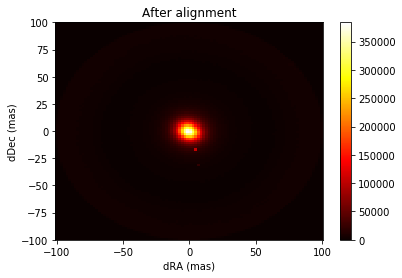

In [17]:
dra = (Tall2.ra[I2]-Tall2.ra[J2])*cosdec * 3600.*1000.
ddec = (Tall2.dec[I2]-Tall2.dec[J2]) * 3600.*1000.
plothist(dra, ddec)
plt.xlabel('dRA (mas)')
plt.ylabel('dDec (mas)');
plt.title('After alignment');
plt.savefig('after.png');

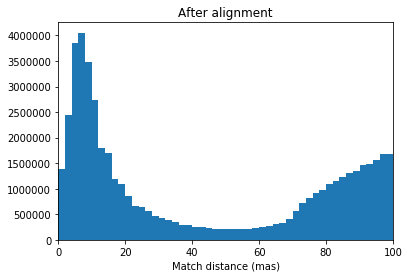

In [27]:
plt.hist(d2*3600.*1000., bins=50);
plt.xlabel('Match distance (mas)');
plt.title('After alignment')
plt.xlim(0,100)
plt.savefig('after-dists.png');

In [30]:
def addnew(F):
    F.nmatched = np.ones(len(F), np.uint8)
    F.avgra = F.ra.copy()
    F.avgdec = F.dec.copy()

def merge(FF, matchdist=0.06):
    F = FF[0].copy()
    addnew(F)
    merged = F

    avgcols = ['avgra', 'avgdec',
        'f475w_rate', 'f475w_raterr', 'f475w_vega', 'f475w_std', 'f475w_err',
        'f475w_chi', 'f475w_snr', 'f475w_sharp', 'f475w_round', 'f475w_crowd',
        'f814w_rate', 'f814w_raterr', 'f814w_vega', 'f814w_std', 'f814w_err',
        'f814w_chi', 'f814w_snr', 'f814w_sharp', 'f814w_round', 'f814w_crowd',]

    for F in FF[1:]:
        addnew(F)
        I,J,d = match_radec(merged.ra, merged.dec, F.ra, F.dec, matchdist/3600., nearest=True)
        print('Matched', len(I), 'of', len(merged), 'old and', len(F), 'new')

        # unmatched
        Uf = np.ones(len(F), bool)
        Uf[J] = False
        U = F[Uf]

        # matched --
        for col in avgcols:
            m = merged.get(col)
            f = F.get(col)
            m[I] += f[J]
        merged.nmatched[I] += 1
    
        merged = merge_tables([merged, U])

    for col in avgcols:
        m = merged.get(col)
        m /= merged.nmatched.astype(float)
    return merged

In [31]:
merged = merge(TT)

Matched 0 of 191458 old and 280236 new
Matched 103124 of 471694 old and 242426 new
Matched 17325 of 612022 old and 342934 new
Matched 131924 of 937924 old and 292772 new
Matched 22772 of 1100330 old and 373133 new
Matched 23550 of 1451110 old and 370587 new
Matched 119238 of 1798535 old and 335510 new
Matched 25655 of 2015978 old and 374414 new
Matched 154018 of 2365073 old and 350757 new
Matched 27098 of 2563229 old and 358455 new
Matched 157018 of 2894999 old and 349966 new
Matched 118505 of 3089624 old and 246815 new
Matched 45326 of 3219849 old and 344131 new
Matched 313521 of 3519241 old and 357744 new
Matched 65850 of 3568953 old and 391670 new
Matched 362325 of 3895858 old and 410006 new
Matched 51639 of 3950071 old and 431093 new
Matched 85041 of 4330548 old and 465827 new
Matched 356684 of 4712682 old and 417997 new
Matched 83639 of 4780102 old and 430229 new
Matched 335818 of 5128028 old and 389179 new
Matched 43475 of 5187375 old and 373105 new
Matched 325415 of 5517762 old 

In [32]:
len(merged)

25138652

In [33]:
Counter(merged.nmatched)

Counter({1: 9214220, 2: 9990986, 3: 5129216, 4: 715786, 5: 88444})

In [36]:
merged.writeto('/global/cscratch1/sd/dstn/m33/merged-all.fits')

In [35]:
len(Tall)

47475330

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.
